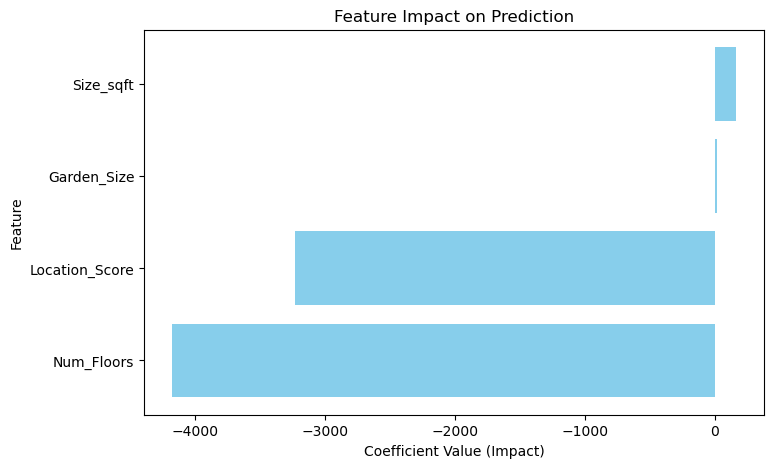

Feature Impact Report saved as 'feature_impact_report.csv'
                     Impact
Size_sqft        161.832150
Garden_Size       15.897729
Location_Score -3226.347703
Num_Floors     -4174.282784


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create Data (Synthetic Features & Target)
data = {
    "Size_sqft": [1200, 1400, 1600, 1800, 2000, 2200, 2500, 2800, 3000, 3500],
    "Location_Score": [80, 85, 90, 88, 92, 95, 96, 98, 99, 100],  # Score out of 100
    "Num_Floors": [1, 2, 1, 2, 3, 2, 3, 4, 3, 5],  # Number of floors
    "Garden_Size": [500, 600, 550, 650, 700, 800, 750, 900, 950, 1000],  # Garden area in sqft
    "Price": [250000, 270000, 290000, 310000, 330000, 360000, 400000, 450000, 480000, 550000]
}

df = pd.DataFrame(data)

# Step 2: Split Features (X) and Target (y)
X = df[["Size_sqft", "Location_Score", "Num_Floors", "Garden_Size"]]
y = df["Price"]

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 4: Get Feature Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Impact"])
coefficients = coefficients.sort_values(by="Impact", ascending=False)

# Step 5: Save Feature Importance Report
coefficients.to_csv("feature_impact_report.csv", index=True)

# Step 6: Visualization
plt.figure(figsize=(8, 5))
plt.barh(coefficients.index, coefficients["Impact"], color="skyblue")
plt.xlabel("Coefficient Value (Impact)")
plt.ylabel("Feature")
plt.title("Feature Impact on Prediction")
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()

print("Feature Impact Report saved as 'feature_impact_report.csv'")
print(coefficients)
